In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
from pymoo.core.problem import ElementwiseProblem

In [4]:
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=2, #x is a one-dimensional NumPy array of length n_var=2
                         n_obj=2, #number of objectives
                         n_constr=2, #number of constraints
                         xl=np.array([-2,2]), #lower
                         xu=np.array([2,2]) #upper
                        )
    
    def _evaluate(self, x, out, *args, **kwargs): 
        #x:variable(numpy array), out:output(dictionary). 
        #out["F"]: numpy array with n_obj length, objective values are written here.
        #out["G"]: numpy array with n_constr length, constraints values are written here. 
        
        r = (x[0]**2 + x[1]**2)
        
        f1 = 100 * r
        f2 = (x[0]-1)**2 + x[1]**2
        
        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = -20*(x[0]-0.4) * (x[0]-0.6) /4.8
        
        out["F"] = [f1,f2]
        out["G"] = [g1,g2]                         

In [5]:
problem = MyProblem()

In [6]:
problem.n_var

2

In [7]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)

In [8]:
from pymoo.factory import get_termination

termination = get_termination("n_gen", 40)

In [9]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |      40 |  0.00000E+00 |  2.36399E+01 |       1 |            - |            -
    2 |      50 |  0.00000E+00 |  1.15477E+01 |       2 |  2.370587431 |        ideal
    3 |      60 |  0.00000E+00 |  5.285864685 |       2 |  0.00000E+00 |            f
    4 |      70 |  0.00000E+00 |  2.023871174 |       3 |  0.003509239 |        ideal
    5 |      80 |  0.00000E+00 |  0.454393886 |       6 |  0.058670582 |            f
    6 |      90 |  0.00000E+00 |  0.064764496 |       6 |  0.00000E+00 |            f
    7 |     100 |  0.00000E+00 |  0.001883165 |       7 |  0.000162146 |            f
    8 |     110 |  0.00000E+00 |  0.00000E+00 |       9 |  0.036451790 |        ideal
    9 |     120 |  0.00000E+00 |  0.00000E+00 |      10 |  0.000493938 |            f
   10 |     130 |  0.00000E+00 |  0.00000E+00 |      12 |  0.014066006 |            f
   11 |     140 |  0.00000E+00 |  0.00000E+00 |      1

/opt/conda/lib/python3.8/site-packages/pymoo/operators/mutation/pm.py:34: RuntimeWarning: divide by zero encountered in true_divide
  delta1 = (X - xl) / (xu - xl)
/opt/conda/lib/python3.8/site-packages/pymoo/operators/mutation/pm.py:34: RuntimeWarning: invalid value encountered in true_divide
  delta1 = (X - xl) / (xu - xl)
/opt/conda/lib/python3.8/site-packages/pymoo/operators/mutation/pm.py:35: RuntimeWarning: divide by zero encountered in true_divide
  delta2 = (xu - X) / (xu - xl)
/opt/conda/lib/python3.8/site-packages/pymoo/operators/mutation/pm.py:35: RuntimeWarning: invalid value encountered in true_divide
  delta2 = (xu - X) / (xu - xl)
/opt/conda/lib/python3.8/site-packages/pymoo/operators/mutation/pm.py:56: RuntimeWarning: invalid value encountered in multiply
  _Y = X + deltaq * (xu - xl)
/opt/conda/lib/python3.8/site-packages/pymoo/algorithms/moo/nsga2.py:191: RuntimeWarning: invalid value encountered in subtract
  dist = np.row_stack([_F, np.full(n_obj, np.inf)]) - np.row

In [10]:
F

array([[479.52622769,   4.0117127 ],
       [402.60563005,   4.70321702],
       [436.27168437,   4.15819728],
       [415.83200568,   4.362531  ],
       [404.16876018,   4.63333676],
       [408.42016047,   4.50385135],
       [453.98268687,   4.07036864],
       [469.22826556,   4.02821216],
       [465.1645957 ,   4.03715414],
       [449.73096952,   4.08690593],
       [446.57584891,   4.10082847],
       [475.71818044,   4.01685792],
       [456.62543672,   4.06125687],
       [409.4701987 ,   4.47922823],
       [474.00172561,   4.01953214],
       [449.60960975,   4.08741431],
       [414.01357723,   4.39144152],
       [411.32143844,   4.44026748],
       [442.69448535,   4.12012451],
       [438.87118964,   4.14177662],
       [444.0471715 ,   4.11311085],
       [479.06515909,   4.01227976],
       [413.17633591,   4.4057789 ],
       [412.53212572,   4.41730641],
       [460.46627412,   4.04946148],
       [445.58732825,   4.10550551],
       [408.77751087,   4.49523782],
 

/tmp/ipykernel_141/2261655750.py:6: UserWarning: Attempting to set identical bottom == top == 2.0 results in singular transformations; automatically expanding.
  plt.ylim(xl[1], xu[1])


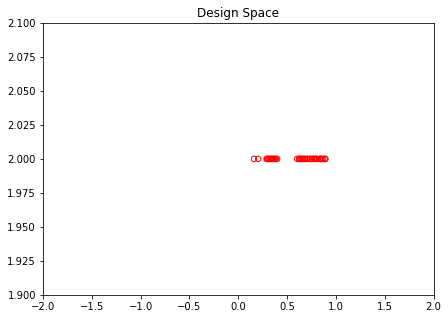

In [11]:
import matplotlib.pyplot as plt
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()

/tmp/ipykernel_141/975649869.py:4: UserWarning: Attempting to set identical bottom == top == 2.0 results in singular transformations; automatically expanding.
  plt.ylim(xl[1], xu[1])


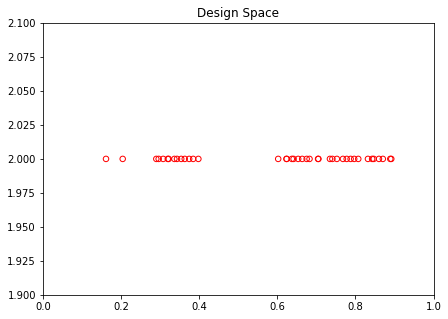

In [12]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(0,1)
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()

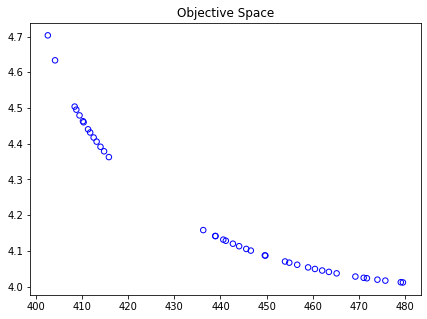

In [13]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

## decision making

In [14]:
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [402.6056300475168, 479.5262276935877]
Scale f2: [4.01171269597562, 4.703217018632526]


In [15]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

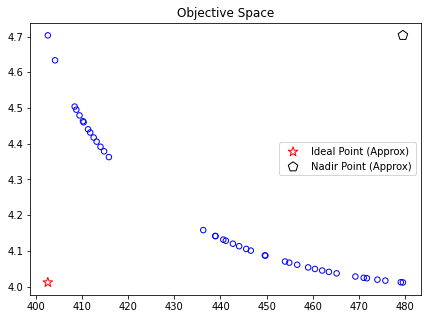

In [16]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.legend()
plt.show()

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


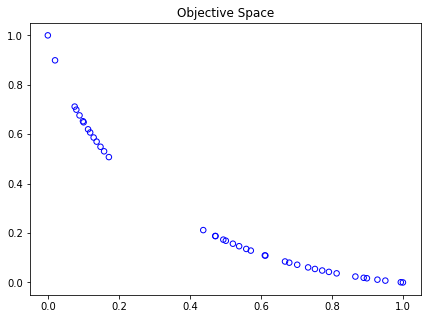

In [17]:
#normalization

nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

In [18]:
weights = np.array([0.2, 0.8])

In [19]:
from pymoo.decomposition.asf import ASF

decomp = ASF() #Augmented Scalarization Function (ASF)

In [20]:
i = decomp.do(nF, 1/weights).argmin()

In [21]:
i

25

Best regarding ASF: Point 
i = 25
F = [445.58732825   4.10550551]


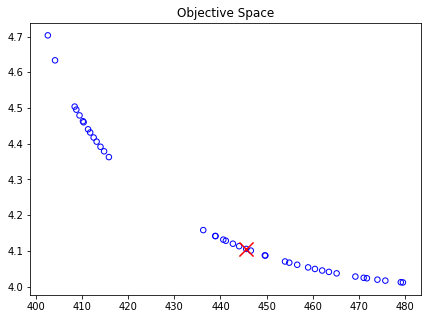

In [22]:
print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

In [23]:
x_res = [0,0]
x_res[0], x_res[1] = X[25]
x_res

[0.675183887929685, 2.0]

In [24]:
f1 = 100 * (x_res[0]**2 + x_res[1]**2)
f2 = (x_res[0]-1)**2 + x_res[1]**2

In [25]:
f1, f2

(445.5873282519845, 4.105505506660475)

## MOEA/D

/opt/conda/lib/python3.8/site-packages/pymoo/operators/crossover/sbx.py:46: RuntimeWarning: invalid value encountered in power
  betaq[mask_not] = np.power((1.0 / (2.0 - rand * alpha)), (1.0 / (self.eta + 1.0)))[mask_not]


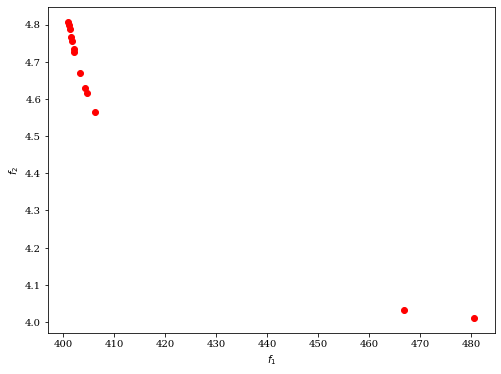

In [29]:
from pymoo.algorithms.moo.ctaea import CTAEA
from pymoo.factory import get_problem, get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

#problem = get_problem("c1dtlz1", None, 3, k=5)

ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=12)

# create the algorithm object
algorithm = CTAEA(ref_dirs=ref_dirs)

# execute the optimization
res = minimize(problem,
               algorithm,
               ('n_gen', 600),
               seed=1
               )

sc = Scatter(legend=False, angle=(45, 30))
sc.add(problem.pareto_front(ref_dirs), plot_type='surface', alpha=0.2, label="PF", color="blue")
sc.add(res.F, color="red")
sc.show()